## Gambler's Problem
Example 4.3 and Exercise 4.9 of the book.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
probs = np.array([0.4, 0.25, 0.55])
SIZE = 100
theta = 1e-8

In [3]:
def gather_value(state, prob, states):
    max_value, max_action = -math.inf, 0
    end_state = min(state, SIZE - state)

    # for each of (s,a)...
    for amount in range(1, end_state+1):
        reward_win = 1 if state + amount == SIZE else 0
        v_s = prob * (reward_win + states[min(state + amount, SIZE)]) + (1-prob) * (states[max(0, state - amount)])
        if v_s > max_value:
            max_value = v_s
            max_action = amount
            
    return max_value, max_action

In [4]:
def policy_evaluation(prob, states, policy):
    delta = 0
    old_states = states.copy()
    for i in range(1, SIZE):
        old_value = states[i]
        states[i], _ = gather_value(i, prob, old_states)
        delta = max(delta, abs(states[i] - old_value))
    if delta < theta:
        for i in range(1, SIZE):
            _, policy[i] = gather_value(i, prob, states)
        return True
    return False

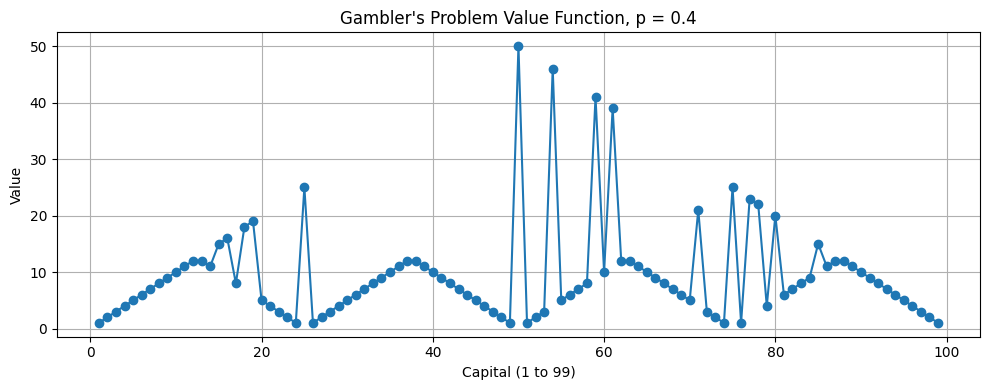

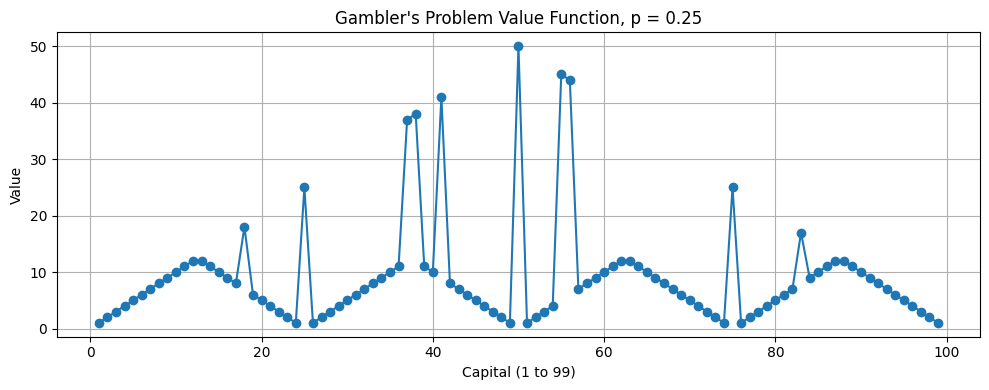

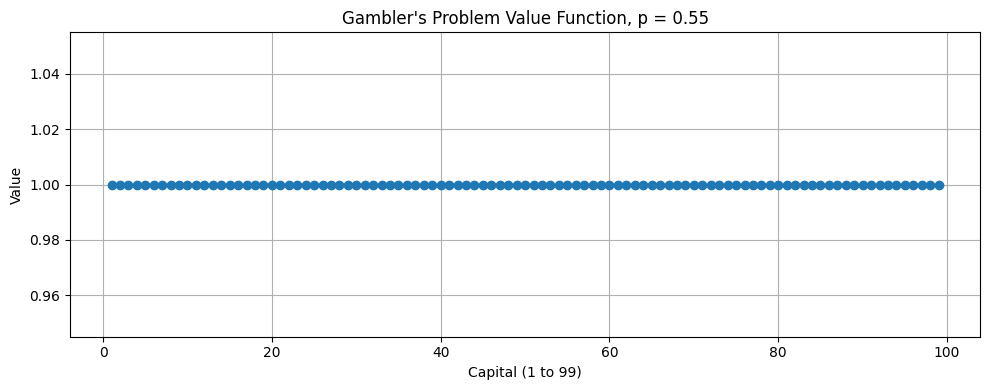

In [5]:
for prob in probs:
    count = 0
    break_loop = False

    states = [0.3] * (SIZE+1) # prob of winning
    policy = np.zeros(SIZE+1) # how much to gamble
    states[SIZE] = 0
    states[0] = 0
    while not break_loop:
        # print("Starting iteration ", count)
        break_loop = policy_evaluation(prob, states, policy)
        count += 1

    # Draw plot
    # X-axis from 1 to 99
    x = np.arange(1, 100)

    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(x, policy[1:SIZE], marker='o', linestyle='-')
    plt.xlabel('Capital (1 to 99)')
    plt.ylabel('Value')
    plt.title(f'Gambler\'s Problem Value Function, p = {prob}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()